In [1]:
#from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import warnings
import itertools

In [2]:
import json
with open('Lo_dict.json', 'r') as f:
    Lo_1 = json.load(f)
    
with open('Location_dict.json', 'r') as f:
    Location_dict = json.load(f)
    
Lo_dict = {}
for i in list(Lo_1.keys()):
    Lo_dict[int(i)] = Lo_1[i]
    
list_day = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
list_month = ['01','02','03','04','05','06','07','08','09','10','11','12']
list_hour = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [7]:
import json
with open('Lo_dict.json', 'r') as f:
    Lo_1 = json.load(f)
    
with open('Location_dict.json', 'r') as f:
    Location_dict = json.load(f)
    
Lo_dict = {}
for i in list(Lo_1.keys()):
    Lo_dict[int(i)] = Lo_1[i]

In [8]:
np.array(Location_dict['2018-06-01']['03'])

array([   0.,   40.,   11.,    4.,    5.,   21.,   28.,   13.,   44.,
         20.,    2.,   59.,    6.,  106.,    8.,    7.,    0.,   56.,
         41.,   42.,   38.,   43.,    0.,   10.,   15.,   34.,    4.,
          6.,   32.,  111.,   29.,   13.,    0.,   57.,    7.,    0.,
        126.,    0.,    0.,    9.,   98.,    5.,    4.,    7.,    4.,
         35.,    1.,   46.,   25.,  104.,    0.,    2.,   13.,   47.,
         38.,   14.,   27.,   18.,   18.,   26.,   55.,    0.,    2.,
         74.,    0.,    0.,   94.,    9.,    0.])

In [9]:
my_list = list(Lo_dict.keys())
np.array(my_list)

array([128,   4, 261, 262, 263, 137, 140, 141, 142, 143, 144, 152, 148,
       151,  24, 153, 103, 158, 161, 162, 163, 164, 166,  41, 170,  43,
        45,  48,  50, 202, 116, 186,  13,  42, 194,  68, 104,  12,  74,
        75,  79, 209, 211,  87,  88,  90, 224, 100, 229, 230, 231, 232,
       105, 234, 107, 236, 237, 238, 239, 113, 114, 243, 244, 246, 233,
       120, 249, 125, 127])

In [3]:
# prepare the data
new_data = []
for m in list_month:
    for d in list_day:
        calendar = '2018-' + m + '-' + d
        for h in list_hour:
            new_data.append(Location_dict[calendar][h])
            
Data = pd.DataFrame(new_data)
dataset = Data.values
dataset = dataset.astype('float32')
# normalize dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
a = dataset.shape[0]
b = dataset.shape[1]
new_dataset = scaler.fit_transform(dataset.reshape(a*b,1))
new_dataset = new_dataset.reshape(a,b)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = new_dataset[0:train_size,:], new_dataset[train_size:len(dataset),:]

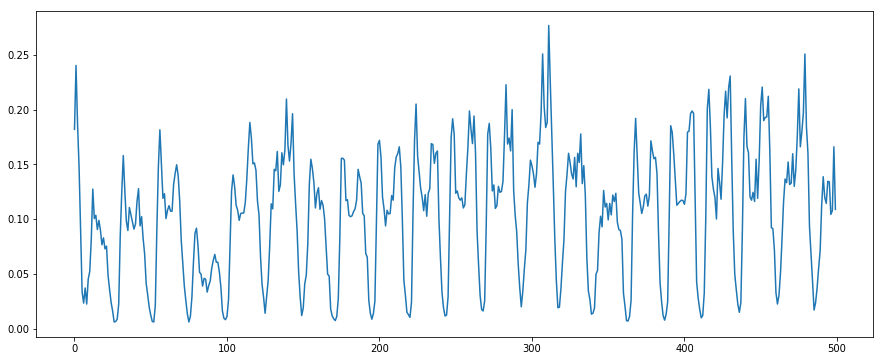

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.plot(train[:500,1])
plt.show()

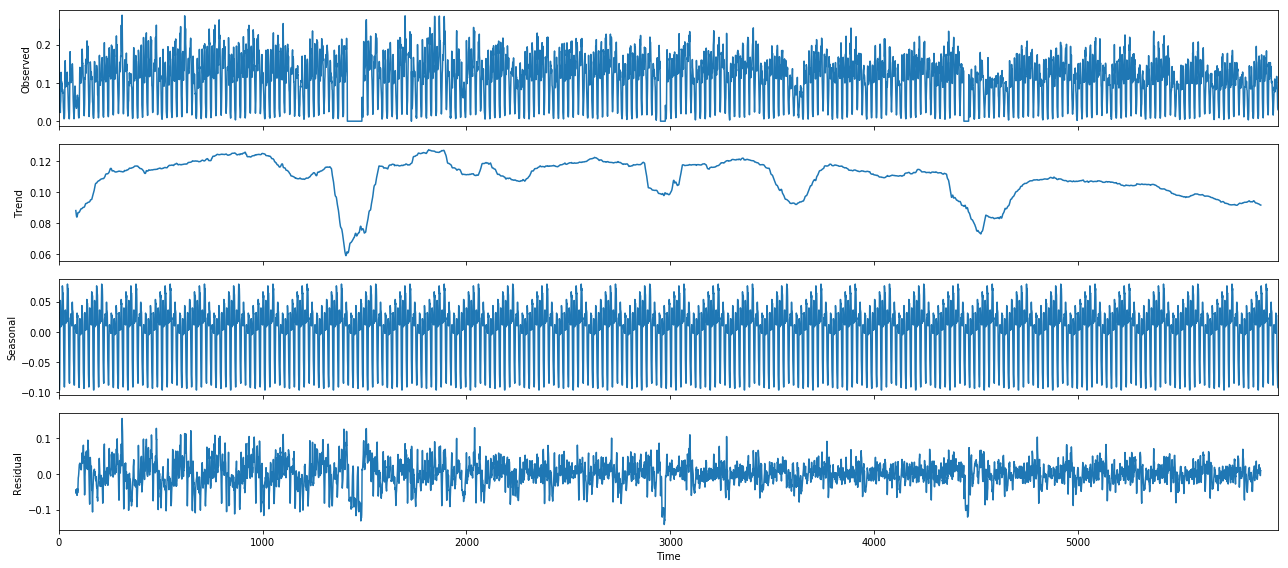

In [6]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train[:,1], model='additive',freq=168)
fig = decomposition.plot()
plt.show()

In [7]:
# apply the arima model here
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [36]:
# apply grid search to find the best
# not work properly I feel.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train[:,1],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 24)12 - AIC:-13493.666586985288
ARIMA(0, 0, 0)x(0, 1, 1, 24)12 - AIC:-21488.40166984448
ARIMA(0, 0, 0)x(1, 0, 0, 24)12 - AIC:-20698.9380849858
ARIMA(0, 0, 0)x(1, 0, 1, 24)12 - AIC:-20793.657241456764
ARIMA(0, 0, 0)x(1, 1, 0, 24)12 - AIC:-20574.63919525122
ARIMA(0, 0, 0)x(1, 1, 1, 24)12 - AIC:-22464.861502923904
ARIMA(0, 0, 1)x(0, 0, 0, 24)12 - AIC:-14942.830805583751
ARIMA(0, 0, 1)x(0, 0, 1, 24)12 - AIC:-19088.399425142306
ARIMA(0, 0, 1)x(0, 1, 0, 24)12 - AIC:-24539.74633913998
ARIMA(0, 0, 1)x(0, 1, 1, 24)12 - AIC:-26027.778813040597
ARIMA(0, 0, 1)x(1, 0, 0, 24)12 - AIC:-24763.706113974768
ARIMA(0, 0, 1)x(1, 0, 1, 24)12 - AIC:-26115.2529796635
ARIMA(0, 0, 1)x(1, 1, 0, 24)12 - AIC:-24728.839035081466
ARIMA(0, 0, 1)x(1, 1, 1, 24)12 - AIC:-26683.96818559589
ARIMA(0, 1, 0)x(0, 0, 1, 24)12 - AIC:-27182.69888871864
ARIMA(0, 1, 0)x(0, 1, 1, 24)12 - AIC:-28872.481003362183
ARIMA(0, 1, 0)x(1, 0, 0, 24)12 - AIC:-28157.268676000655
ARIMA(0, 1, 0)x(1, 0, 1, 24)12 - AIC:-28

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 24)12 - AIC:-27430.350594126896
ARIMA(0, 1, 1)x(1, 1, 1, 24)12 - AIC:-29374.126609198065
ARIMA(1, 0, 0)x(0, 0, 0, 24)12 - AIC:-25319.83771114109
ARIMA(1, 0, 0)x(0, 0, 1, 24)12 - AIC:-27310.567330721435


/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 24)12 - AIC:-27470.278280157065
ARIMA(1, 0, 0)x(0, 1, 1, 24)12 - AIC:-29313.897320892338
ARIMA(1, 0, 0)x(1, 0, 0, 24)12 - AIC:-28412.030810100834
ARIMA(1, 0, 0)x(1, 0, 1, 24)12 - AIC:-29405.118246511243
ARIMA(1, 0, 0)x(1, 1, 0, 24)12 - AIC:-27816.765604714827
ARIMA(1, 0, 0)x(1, 1, 1, 24)12 - AIC:-29808.90395587559
ARIMA(1, 0, 1)x(0, 0, 0, 24)12 - AIC:-26371.285814878684
ARIMA(1, 0, 1)x(0, 0, 1, 24)12 - AIC:-27662.975547643444
ARIMA(1, 0, 1)x(0, 1, 0, 24)12 - AIC:-27575.827564915086
ARIMA(1, 0, 1)x(0, 1, 1, 24)12 - AIC:-29576.563368165203
ARIMA(1, 0, 1)x(1, 0, 0, 24)12 - AIC:-28551.125453814246
ARIMA(1, 0, 1)x(1, 0, 1, 24)12 - AIC:-29683.669254319935
ARIMA(1, 0, 1)x(1, 1, 0, 24)12 - AIC:-28032.339778344183
ARIMA(1, 0, 1)x(1, 1, 1, 24)12 - AIC:-29971.895208151436
ARIMA(1, 1, 0)x(0, 0, 0, 24)12 - AIC:-26311.65220432701
ARIMA(1, 1, 0)x(0, 0, 1, 24)12 - AIC:-27538.611837962388
ARIMA(1, 1, 0)x(0, 1, 0, 24)12 - AIC:-26951.363757822706
ARIMA(1, 1, 0)x(0, 1, 1, 24)12 - 

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 24)12 - AIC:-29371.550791893933


In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(train[:,1])

(-9.867078270186763,
 4.0869970625062534e-17,
 33,
 5947,
 {'1%': -3.431450071438642,
  '10%': -2.5670287644760372,
  '5%': -2.8620261296599536},
 -29849.97742693474)

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  import sys


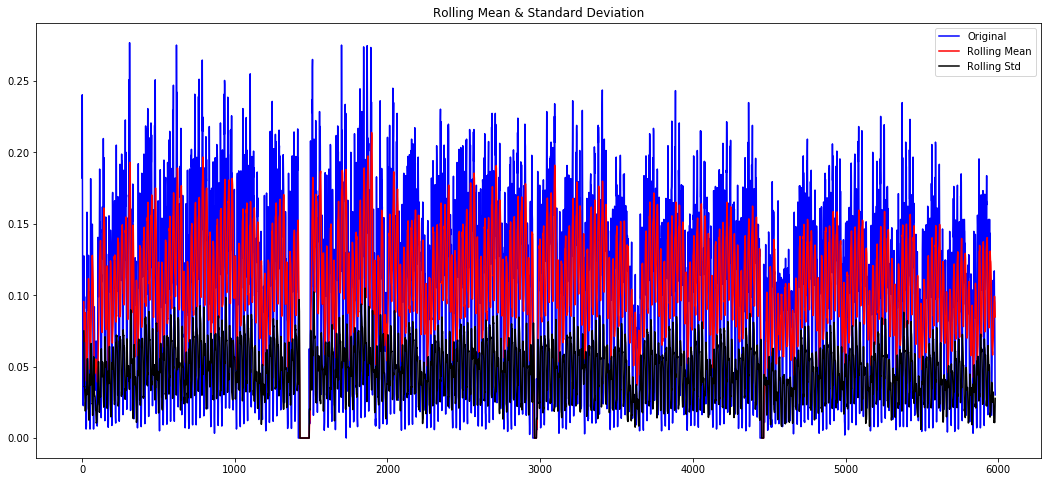

Results of Dickey-Fuller Test:
Test Statistic                -9.867078e+00
p-value                        4.086997e-17
#Lags Used                     3.300000e+01
Number of Observations Used    5.947000e+03
Critical Value (1%)           -3.431450e+00
Critical Value (5%)           -2.862026e+00
Critical Value (10%)          -2.567029e+00
dtype: float64


In [11]:
test_stationarity(train[:,1])
# The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. 

In [10]:
# test for stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  import sys


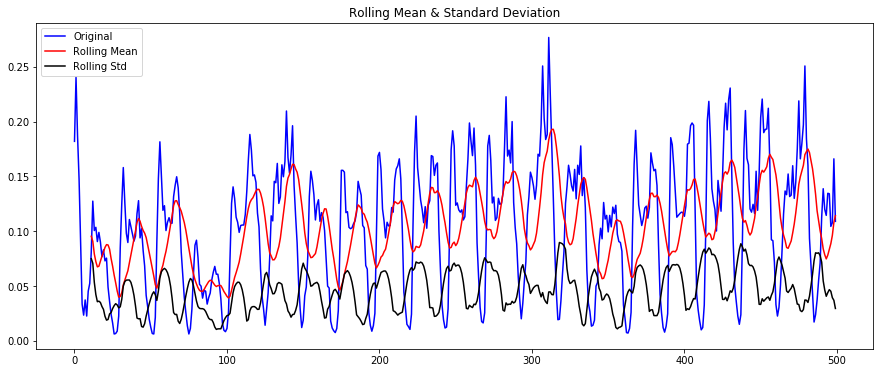

Results of Dickey-Fuller Test:
Test Statistic                  -3.768679
p-value                          0.003245
#Lags Used                      18.000000
Number of Observations Used    481.000000
Critical Value (1%)             -3.444018
Critical Value (5%)             -2.867568
Critical Value (10%)            -2.569980
dtype: float64


In [19]:
test_stationarity(train[:500,1])

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimizati

{'aic':               0             1             2             3             4  \
 0 -16825.889662 -22350.460756 -25386.619986 -26436.470403 -26903.007254   
 1 -25612.370739 -26818.457345 -27179.712503 -27192.390199 -27270.387717   
 2 -27316.640829 -27366.652668 -27387.507225 -27385.779052 -27592.021302   
 3 -27351.093261 -27382.535596 -27385.538203 -27873.380279 -27967.424047   
 4 -27373.455694 -27393.410567 -27671.223111 -27676.275215 -27679.197835   
 5 -27462.504913 -27472.120373 -27677.381165 -27699.083441 -27982.563729   
 6 -27485.996860 -27534.149721 -27950.379571 -27965.042801 -28037.794683   
 7 -27531.530284 -27557.679674 -28160.429416 -28083.935251 -28039.793668   
 
               5             6             7  
 0 -27142.413758 -27363.578733 -27434.204515  
 1 -27345.462773 -27423.119968 -27362.046736  
 2 -27679.476502 -27768.572107 -27804.787691  
 3 -27973.351404 -28003.172402 -27627.155313  
 4 -27691.955720           NaN -27836.916341  
 5 -27984.811784 -28053.4

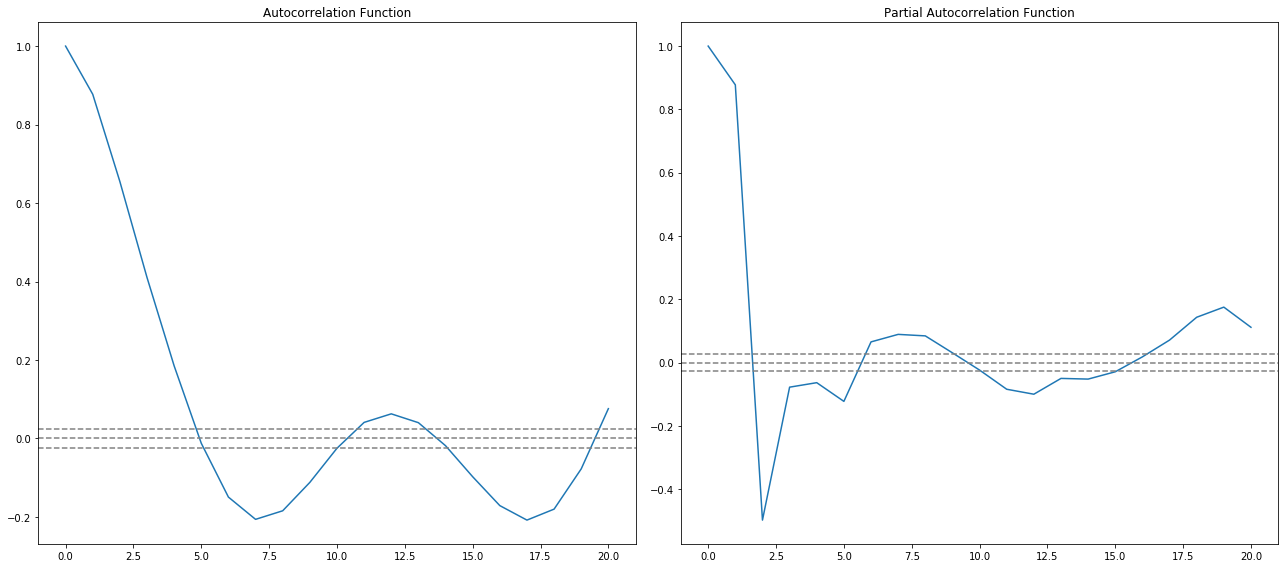

In [20]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train[:,1], nlags=20)
lag_pacf = pacf(train[:,1], nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train[:,1])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train[:,1])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train[:,1])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train[:,1])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# we could seee that p = 4,5, first cross the CI in the first figure, q = 1,2
# or we could use another equation directly
sm.tsa.arma_order_select_ic(train[:,1], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 3.4188')

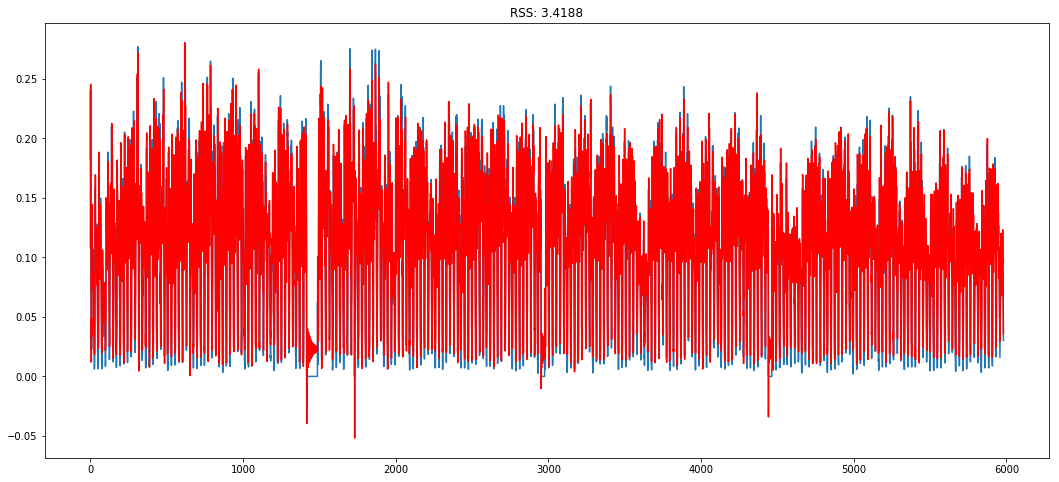

In [66]:
model = ARIMA(train[:,1], order=(5, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train[:,1])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train[:,1])**2))

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.3005')

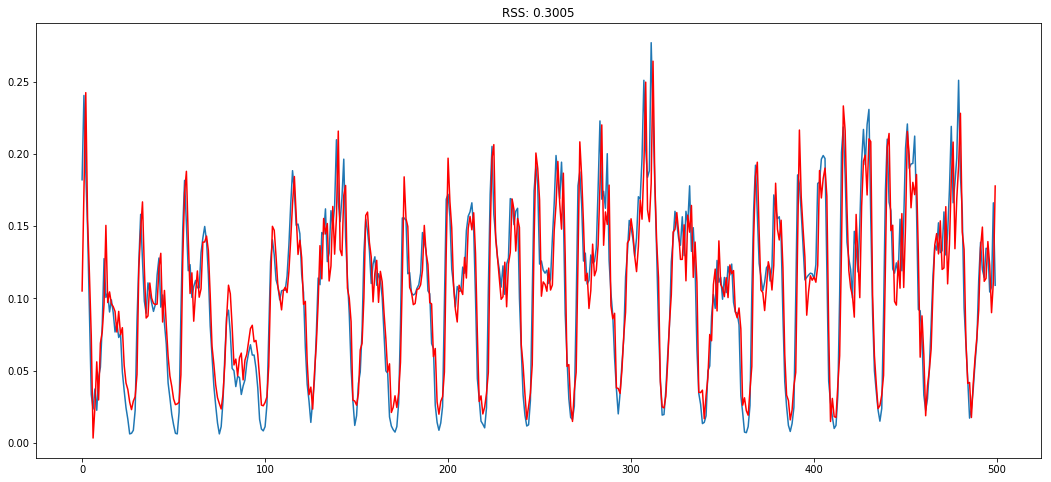

In [50]:
model = ARIMA(train[:500,1], order=(5, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train[:500,1])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train[:500,1])**2))

In [67]:
#The aic value for (5,0,2)
results_ARIMA.aic

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


-27677.381164923318

In [69]:
print(results_ARIMA.summary().tables[1])

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1086      0.001     73.782      0.000       0.106       0.111
ar.L1.y        2.3993      0.018    134.914      0.000       2.364       2.434
ar.L2.y       -2.7544      0.038    -71.787      0.000      -2.830      -2.679
ar.L3.y        1.6226      0.046     35.470      0.000       1.533       1.712
ar.L4.y       -0.3873      0.035    -11.079      0.000      -0.456      -0.319
ar.L5.y       -0.0416      0.015     -2.813      0.005      -0.071      -0.013
ma.L1.y       -1.1629      0.012    -94.902      0.000      -1.187      -1.139
ma.L2.y        0.9329      0.007    134.632      0.000       0.919       0.946


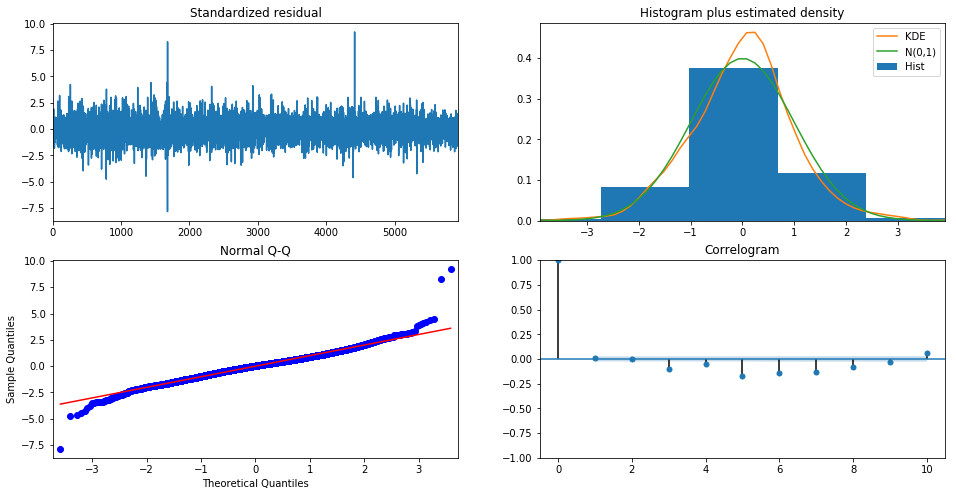

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [104]:
pred = results_ARIMA.forecast(steps = 120)
pred_uc[0]

array([0.04007847, 0.05532708, 0.07248768, 0.09091549, 0.10900454,
       0.12317393, 0.12996408, 0.12872581, 0.12226934, 0.11496562,
       0.10999685, 0.10791378, 0.10730352, 0.10661245, 0.10548398,
       0.10470349, 0.10514094, 0.10680237, 0.10878309, 0.11001813,
       0.11008446, 0.10939391, 0.108722  , 0.10855879, 0.10882035,
       0.10907192, 0.10897923, 0.10857951, 0.10818946, 0.10809589,
       0.10832263, 0.10865015, 0.1088273 , 0.1087706 , 0.10859411,
       0.10847798, 0.10851124, 0.10863913, 0.10873663, 0.10872461,
       0.10862667, 0.10853207, 0.10851229, 0.10856707, 0.10863793,
       0.10866568, 0.10863755, 0.10858823, 0.10856266, 0.10857783,
       0.10861436, 0.10863902, 0.10863413, 0.10860893, 0.10858718,
       0.1085854 , 0.10860101, 0.10861804, 0.10862249, 0.10861319,
       0.10860026, 0.10859485, 0.10859995, 0.10860952, 0.10861507,
       0.10861291, 0.10860624, 0.10860126, 0.10860163, 0.10860603,
       0.10861015, 0.10861072, 0.10860796, 0.10860471, 0.10860

In [110]:
pred_uc = results.forecast(steps=100)
pred_uc

array([0.03223508, 0.07062534, 0.10786069, 0.12565698, 0.129272  ,
       0.12143236, 0.1155815 , 0.12574803, 0.12819715, 0.11984721,
       0.12324651, 0.11694465, 0.13131353, 0.15401849, 0.15300574,
       0.14750437, 0.14927092, 0.15038097, 0.12582646, 0.09834064,
       0.07333208, 0.05507538, 0.03747131, 0.03171048, 0.0368792 ,
       0.08119905, 0.1248744 , 0.14182481, 0.1427192 , 0.1302278 ,
       0.12527533, 0.13089353, 0.13321307, 0.13156839, 0.12973503,
       0.12432317, 0.14418797, 0.16869256, 0.16662936, 0.15966459,
       0.16257052, 0.15951266, 0.13288969, 0.09853877, 0.07089465,
       0.05336055, 0.03821479, 0.03237209, 0.03837473, 0.08427189,
       0.12966032, 0.14638573, 0.1465564 , 0.13282761, 0.12811412,
       0.13252243, 0.1348075 , 0.13494646, 0.13172118, 0.12654607,
       0.14787282, 0.17285612, 0.1705135 , 0.16315945, 0.16636847,
       0.16220191, 0.13502872, 0.09885163, 0.07050644, 0.05316455,
       0.03867272, 0.03280824, 0.03903271, 0.08534944, 0.13119

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5,1,'RSS: 0.0702')

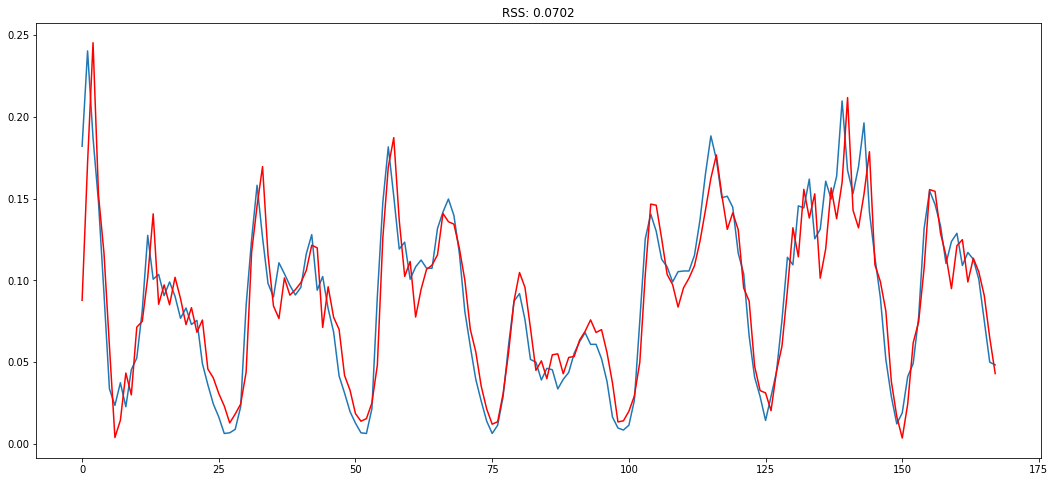

In [111]:
# fit for previous week
model = ARIMA(train[:168,1], order=(5, 0, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train[:168,1])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train[:168,1])**2))

0.001752235627490304


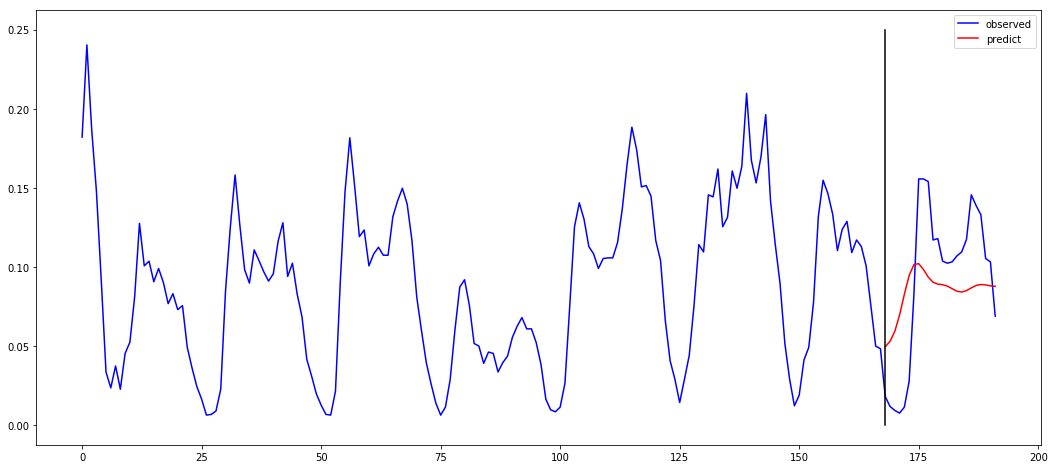

In [132]:
# validation for next day
from sklearn.metrics import mean_squared_error
pred_ci = results_ARIMA.forecast(steps = 24)
pred = pred_ci[0]
true = train[168:192,1]
x = range(168,192)
print(mean_squared_error(true, pred))
plt.plot(train[:192,1],color='b',label='observed')
plt.plot(x,pred,color='r',label='predict')
plt.plot([168,168],[0,0.25],'k-')
plt.legend()
plt.show()

In [14]:
from numpy.linalg import LinAlgError
pred = [[]]*24
for i in range(24):
    model = ARIMA(train[i:i+168,1], order=(5, 0, 2))
    try:
        results_ARIMA = model.fit(disp=-1)  
        value = results_ARIMA.forecast(steps = 1)[0]
    except (ValueError, LinAlgError): # consider the convergence failure and value failure
        pass
    
    pred[i] = value

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3

In [15]:
pred

[array([0.04951125]),
 array([0.01174514]),
 array([0.01436674]),
 array([0.01868605]),
 array([0.02059255]),
 array([0.02176447]),
 array([0.04741312]),
 array([0.10893487]),
 array([0.18449324]),
 array([0.15156187]),
 array([0.15156187]),
 array([0.09869638]),
 array([0.09869638]),
 array([0.09869638]),
 array([0.09812696]),
 array([0.10342694]),
 array([0.10089887]),
 array([0.11022016]),
 array([0.11368125]),
 array([0.15312644]),
 array([0.12667726]),
 array([0.12543939]),
 array([0.09461377]),
 array([0.09821248])]

In [156]:
train[:15+168,1]

array([0.18204698, 0.24035235, 0.18708053, 0.147651  , 0.09186242,
       0.03355705, 0.02348993, 0.03733221, 0.02265101, 0.04530201,
       0.05243289, 0.08137584, 0.12751678, 0.10067114, 0.10360739,
       0.09060403, 0.09899329, 0.09018456, 0.07676174, 0.08305369,
       0.07298658, 0.07550336, 0.04907718, 0.03607383, 0.02432886,
       0.01635906, 0.00629195, 0.00671141, 0.00880872, 0.02265101,
       0.08473154, 0.125     , 0.15813759, 0.12625839, 0.09815437,
       0.0897651 , 0.11073826, 0.10402685, 0.09689597, 0.09102349,
       0.09563758, 0.11619128, 0.12793624, 0.09395973, 0.10234899,
       0.08263423, 0.06837248, 0.04152685, 0.03104027, 0.01971477,
       0.01258389, 0.00671141, 0.00629195, 0.02139262, 0.09018456,
       0.147651  , 0.18162751, 0.15142618, 0.11912752, 0.12332215,
       0.10067114, 0.10822148, 0.11241611, 0.10738255, 0.10738255,
       0.13171141, 0.14177853, 0.14974833, 0.1396812 , 0.11661074,
       0.08095638, 0.05956376, 0.03942953, 0.02600671, 0.01384

In [162]:
pred[15] = (pred[14]+pred[16])/2
pred[22] = (pred[21]+pred[23])/2

0.00041198434630816076


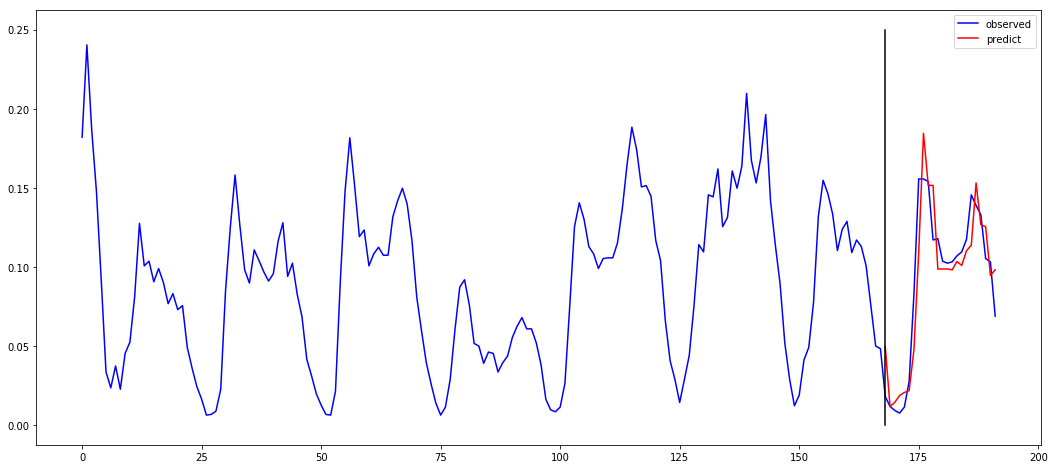

In [18]:
true = train[168:192,1]
x = range(168,192)
print(mean_squared_error(true, pred))
plt.plot(train[:192,1],color='b',label='observed')
plt.plot(x,pred,color='r',label='predict')
plt.plot([168,168],[0,0.25],'k-')
plt.legend()
plt.show()

In [135]:
# now we start iteration and calculate the total mse (we use one week to predict next day).

In [164]:
#Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [23]:
arimax = sm.tsa.statespace.SARIMAX(train[:,1],order=(7,1,7),seasonal_order=(0,0,0,0),exog = train[:,2],freq='D',
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
arimax.summary()

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 5981
Model:               SARIMAX(7, 1, 7)   Log Likelihood               14241.016
Date:                Tue, 23 Apr 2019   AIC                         -28450.031
Time:                        14:28:49   BIC                         -28342.890
Sample:                             0   HQIC                        -28412.819
                               - 5981                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8905      0.058     50.092      0.000       2.777       3.004
ar.L1          0.5666      0.065      8.669      0.000       0.438       0.695
ar.L2          0.5331      0.068      7.812      0.000       0.399       0.667
ar.L3         -0.3926      0.089     -4.397      0.000      -0.568      -0.218
ar.L4          0.0407      0.084      0.483      0.629      -0.124       0.206
ar.L5         -0.1994      0.074     -2.688      0.007      -0.345      -0.054
ar.L6         -0.5028      0.054     -9.293      0.000      -0.609      -0.397
ar.L7          0.5267      0.034     15.578      0.000       0.460       0.593
ma.L1         -0.5004      0.067     -7.483      0.000      -0.631      -0.369
ma.L2         -0.8116      0.062    -12.986      0.000      -0.934      -0.689
ma.L3          0.4003      0.108      3.718      0.000       0.189       0.611
ma.L4          0.1260      0.091      1.379      0.168      -0.053       0.305
ma.L5          0.0316      0.092      0.343      0.732      -0.149       0.212
ma.L6          0.4548      0.074      6.161      0.000       0.310       0.600
ma.L7         -0.6943      0.054    -12.906      0.000      -0.800      -0.589
sigma2         0.0005   1.84e-05     24.855      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                     2709.22   Jarque-Bera (JB):                32.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
aaa = arimax.forecast(steps = 2947,exog = test[:,2].reshape(2947,1))

In [43]:
print('ARIMAX model MSE:{}'.format(mean_squared_error(test[:,1],aaa)))

ARIMAX model MSE:0.0023672971943974907


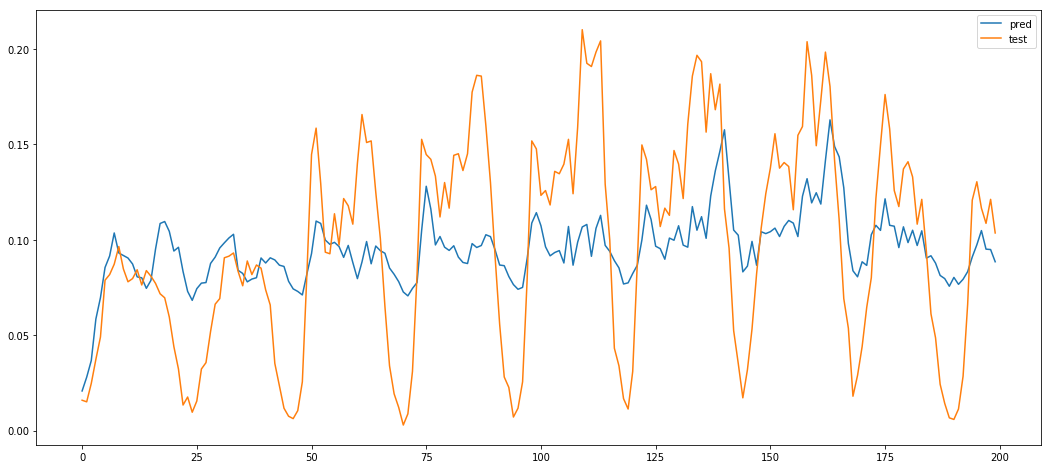

In [46]:
pd.DataFrame({'test':test[:200,1],'pred':aaa[:200]}).plot();plt.show()

In [118]:
from numpy.linalg import LinAlgError
import math
pred = [[]]*168
for i in range(168):
    model = ARIMA(test[i:i+168,1], order=(5, 0, 3))
    try:
        results_ARIMA = model.fit(disp=-1)  
        value = results_ARIMA.forecast(steps = 1)[0]
        if math.isnan(value):
            value = test[i+168,1]
    except (ValueError, LinAlgError): # consider the convergence failure and value failure
        pass
    
    pred[i] = value

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:652: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood opti

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood opti

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood opti

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood opti

In [115]:
i=146
model = ARIMA(test[i:i+168,1], order=(7, 0, 7))
results_ARIMA = model.fit(disp=-1)  
results_ARIMA.forecast(steps = 1)

/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/xiangpeng/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed t

(array([0.06161069]), array([0.01850485]), array([[0.02534184, 0.09787953]]))

In [106]:
results_ARIMA.forecast

<bound method ARMAResults.forecast of <statsmodels.tsa.arima_model.ARMAResults object at 0x7f8fcc94fb00>>

In [98]:
results_ARIMA.forecast(steps = 1)

(array([0.02692296]), array([0.02032345]), array([[-0.01291028,  0.06675619]]))

In [95]:
value

array([1.07548601])

In [86]:
import math
math.isnan(pred[18])

True

In [57]:
ValueError

ValueError

In [112]:
np.where(pred==max(pred))

(array([146]),)

In [92]:
pred[146]

array([1.07548601])

0.00046617071447943695


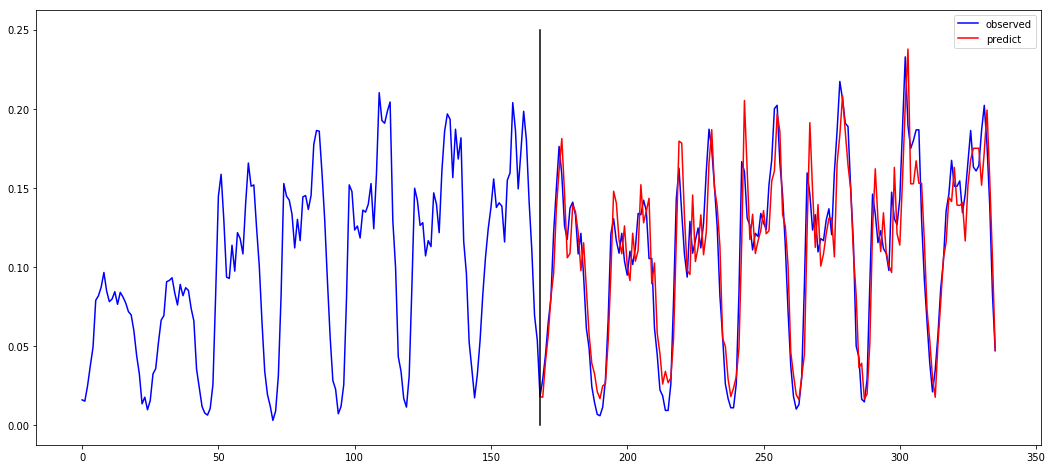

In [119]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
true = test[168:336,1]
x = range(168,336)
print(mean_squared_error(true, pred))
plt.plot(test[:336,1],color='b',label='observed')
plt.plot(x,pred,color='r',label='predict')
plt.plot([168,168],[0,0.25],'k-')
plt.legend(prop={'size': 16})
plt.xlabel('Time period')
plt.ylabel('Normalized demands')
plt.show()

In [5]:
# deep learning model
# build the model
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense, Embedding, Input,Concatenate, Lambda
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import math

Using TensorFlow backend.


In [23]:
# split data into x,y value, we plan to use the value of last three hours,include the exact time and week,
# the same time of last week
def create_dataset(dataset,look_back=168):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = [[]]*(look_back)
        b = dataset[i + look_back]
        for j in range(look_back):
            a[j] = dataset[i+j]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)    

In [24]:
look_back = 168
trainX, trainY = create_dataset(train,look_back=168)
testX, testY = create_dataset(test,look_back=168)

In [30]:
from keras import backend as K
K.clear_session()
tf.reset_default_graph()
def build_model():
    model = Sequential()
    model.add(LSTM(16, activation='relu',dropout=0.2, recurrent_dropout=0.2, input_shape=(look_back,1)))
    model.add(Dense(1))
    model.compile(loss='mse',optimizer='adam',metrics=['mae'])
    return model

graph = tf.get_default_graph()

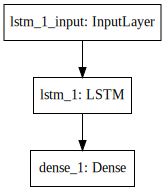

In [31]:
look_back = 168
model = build_model()
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [18]:
partial_trainX.shape

(5086, 168, 1)

In [55]:
val_data.shape

(726, 168, 69)

In [32]:
k = 8
num_epochs = 100
num_val_samples = len(trainX) // k
i = k-1
with graph.as_default():
    val_data = trainX[i*num_val_samples:(i+1)*num_val_samples]
    val_shape = val_data.shape
    val_data = val_data[:,:,1].reshape(val_shape[0],val_shape[1],1)
    val_target = trainY[i*num_val_samples:(i+1)*num_val_samples]
    partial_trainX = np.concatenate([trainX[:i * num_val_samples],
                                    trainX[(i + 1) * num_val_samples:]],
                                    axis=0)
    partial_shape = partial_trainX.shape
    partial_trainX = partial_trainX[:,:,1].reshape(partial_shape[0],partial_shape[1],1)
    partial_trainY = np.concatenate([trainY[:i * num_val_samples],
                                    trainY[(i + 1) * num_val_samples:]],
                                    axis=0)
    history = model.fit(partial_trainX, partial_trainY[:,1],
                  validation_data=(val_data, val_target[:,1]),
                  epochs=num_epochs, batch_size=64)

Train on 5086 samples, validate on 726 samples
Epoch 1/100
5086/5086 [==============================] - 9s 2ms/step - loss: 0.0038 - mean_absolute_error: 0.0503 - val_loss: 0.0020 - val_mean_absolute_error: 0.0364
Epoch 2/100
5086/5086 [==============================] - 8s 2ms/step - loss: 0.0030 - mean_absolute_error: 0.0448 - val_loss: 0.0019 - val_mean_absolute_error: 0.0344
Epoch 3/100
5086/5086 [==============================] - 8s 2ms/step - loss: 0.0027 - mean_absolute_error: 0.0428 - val_loss: 0.0016 - val_mean_absolute_error: 0.0324
Epoch 4/100
5086/5086 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_absolute_error: 0.0405 - val_loss: 0.0014 - val_mean_absolute_error: 0.0305
Epoch 5/100
5086/5086 [==============================] - 8s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0387 - val_loss: 0.0012 - val_mean_absolute_error: 0.0283
Epoch 6/100
5086/5086 [==============================] - 8s 2ms/step - loss: 0.0021 - mean_absolute_error: 0.0367 - va

5086/5086 [==============================] - 8s 2ms/step - loss: 8.3534e-04 - mean_absolute_error: 0.0217 - val_loss: 5.1413e-04 - val_mean_absolute_error: 0.0172
Epoch 49/100
5086/5086 [==============================] - 8s 2ms/step - loss: 8.4124e-04 - mean_absolute_error: 0.0219 - val_loss: 6.0803e-04 - val_mean_absolute_error: 0.0182
Epoch 50/100
5086/5086 [==============================] - 8s 2ms/step - loss: 8.3301e-04 - mean_absolute_error: 0.0216 - val_loss: 4.9960e-04 - val_mean_absolute_error: 0.0168
Epoch 51/100
5086/5086 [==============================] - 8s 2ms/step - loss: 7.8211e-04 - mean_absolute_error: 0.0211 - val_loss: 4.8745e-04 - val_mean_absolute_error: 0.0165
Epoch 52/100
5086/5086 [==============================] - 8s 2ms/step - loss: 8.0370e-04 - mean_absolute_error: 0.0213 - val_loss: 5.9033e-04 - val_mean_absolute_error: 0.0178
Epoch 53/100
5086/5086 [==============================] - 8s 2ms/step - loss: 8.1406e-04 - mean_absolute_error: 0.0215 - val_loss: 5.

5086/5086 [==============================] - 8s 2ms/step - loss: 6.7824e-04 - mean_absolute_error: 0.0195 - val_loss: 6.3555e-04 - val_mean_absolute_error: 0.0185
Epoch 95/100
5086/5086 [==============================] - 8s 2ms/step - loss: 6.8510e-04 - mean_absolute_error: 0.0194 - val_loss: 6.5542e-04 - val_mean_absolute_error: 0.0187
Epoch 96/100
5086/5086 [==============================] - 8s 2ms/step - loss: 7.2236e-04 - mean_absolute_error: 0.0199 - val_loss: 6.3934e-04 - val_mean_absolute_error: 0.0187
Epoch 97/100
5086/5086 [==============================] - 8s 2ms/step - loss: 6.9688e-04 - mean_absolute_error: 0.0195 - val_loss: 6.1965e-04 - val_mean_absolute_error: 0.0183
Epoch 98/100
5086/5086 [==============================] - 8s 2ms/step - loss: 7.0070e-04 - mean_absolute_error: 0.0195 - val_loss: 5.8175e-04 - val_mean_absolute_error: 0.0177
Epoch 99/100
5086/5086 [==============================] - 8s 2ms/step - loss: 6.8324e-04 - mean_absolute_error: 0.0194 - val_loss: 5.

In [33]:
all_mae_histories = []
mae_history = history.history['loss']
all_mae_histories.append(mae_history)
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
loss = history.history['loss']
val_loss = history.history['val_loss']

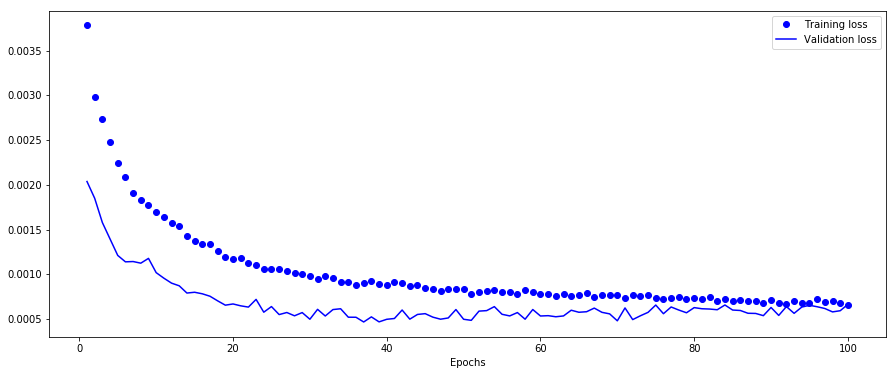

In [34]:
import matplotlib.pyplot as plt
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.legend()
#plt.ylabel('Validation MAE')
plt.show()

In [35]:
history = model.evaluate(testX[:,:,1].reshape(testX[:,:,1].shape[0],testX[:,:,1].shape[1],1), testY[:,1])
history

2778/2778 [==============================] - 1s 539us/step


[0.00079641907648625931, 0.020616957114552147]

In [36]:
predictY = model.predict(testX[:,:,1].reshape(testX[:,:,1].shape[0],testX[:,:,1].shape[1],1))

0.000896985


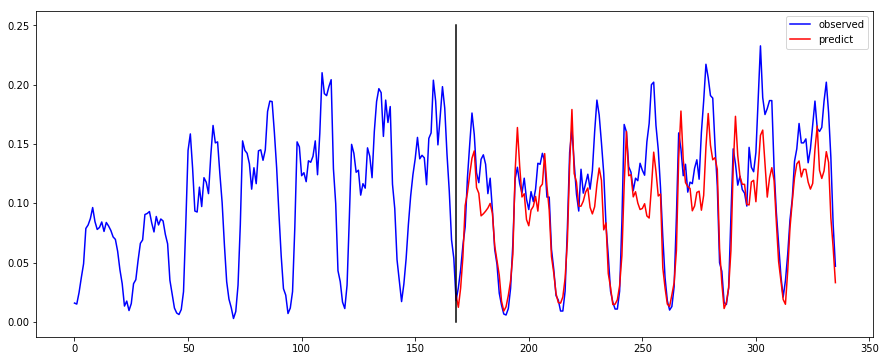

In [37]:
pred = predictY[168:336]
true = test[168:336,1]
x = range(168,336)
print(mean_squared_error(true, pred))
plt.plot(test[:336,1],color='b',label='observed')
plt.plot(x,pred,color='r',label='predict')
plt.plot([168,168],[0,0.25],'k-')
plt.legend()
plt.show()

0.000896985


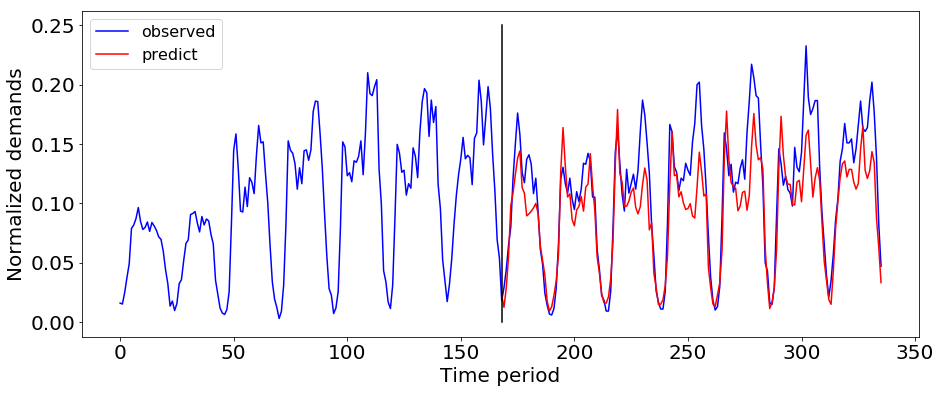

In [38]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
pred = predictY[168:336]
true = test[168:336,1]
x = range(168,336)
print(mean_squared_error(true, pred))
plt.plot(test[:336,1],color='b',label='observed')
plt.plot(x,pred,color='r',label='predict')
plt.plot([168,168],[0,0.25],'k-')
plt.legend(prop={'size': 16})
plt.xlabel('Time period')
plt.ylabel('Normalized demands')
plt.show()